In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Delivery_time.csv')
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

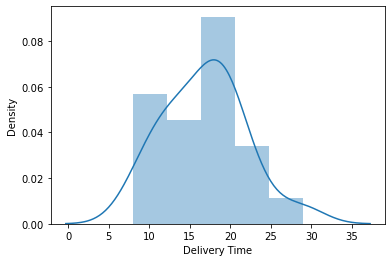

In [4]:
sns.distplot(df['Delivery Time'])

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

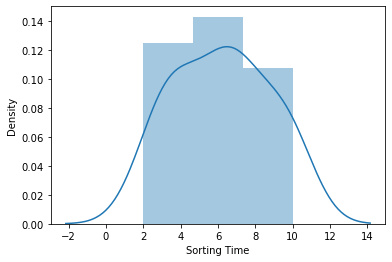

In [5]:
sns.distplot(df['Sorting Time'])

In [6]:
df.columns

Index(['Delivery Time', 'Sorting Time'], dtype='object')

In [7]:
df=df.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'},axis=1)
df.head()

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [8]:
df.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


In [9]:
import statsmodels.formula.api as smf
model=smf.ols('delivery_time~sorting_time',data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 26 Jul 2022   Prob (F-statistic):           3.98e-06
Time:                        20:43:50   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

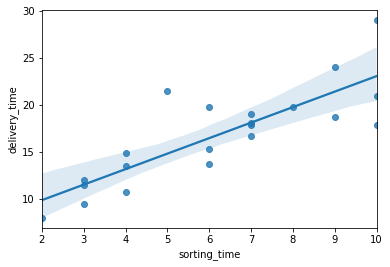

In [10]:
sns.regplot(x='sorting_time',y='delivery_time',data=df)

# Residual Analysis

In [11]:
model_diagonasis=pd.DataFrame({'Predicted_values':model.fittedvalues,'Residuals':model.resid})
model_diagonasis.head()

,Predicted_values,Residuals
0,23.072933,-2.072933
1,13.178814,0.321186
2,16.476853,3.273147
3,21.423913,2.576087
4,23.072933,5.927067


Residual Plot for Homoscedasticity

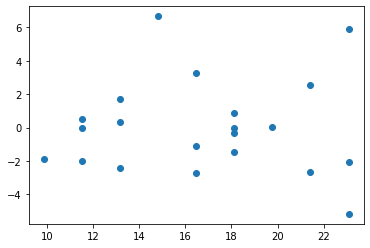

In [12]:
plt.scatter(model.fittedvalues,model.resid)

Test for Normality of Residuals

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

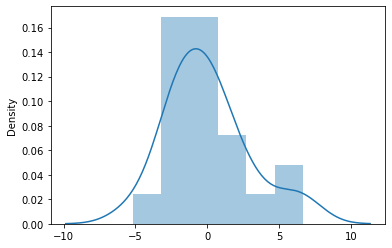

In [13]:
sns.distplot(model.resid)

In [14]:
model.resid.mean()

-6.767073673905716e-16

# Prediction

In [15]:
new_df=pd.Series([7,9])
new_df

0    7
1    9
dtype: int64

In [16]:
pred_df=pd.DataFrame(new_df,columns=['sorting_time'])
pred_df

,sorting_time
0,7
1,9


In [17]:
model.predict(pred_df)

0    18.125873
1    21.423913
dtype: float64

In [18]:
df2=pd.read_csv('Salary_Data.csv')
df2.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [19]:
df2.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

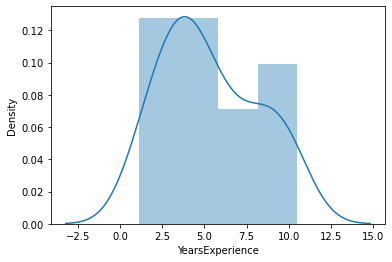

In [21]:
sns.distplot(df2['YearsExperience'])

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

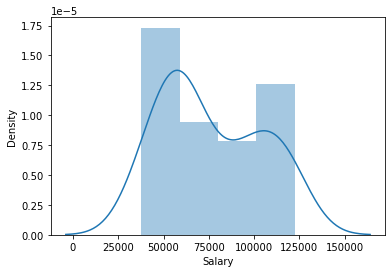

In [22]:
sns.distplot(df2['Salary'])

In [23]:
df2.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [35]:
import statsmodels.formula.api as smf
model2=smf.ols('Salary~YearsExperience',data=df2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 26 Jul 2022   Prob (F-statistic):           1.14e-20
Time:                        20:53:46   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

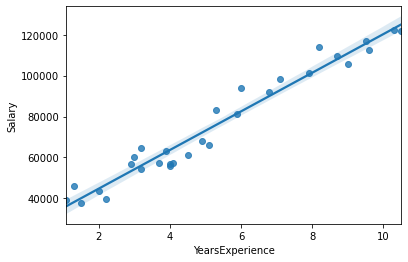

In [36]:
sns.regplot(x='YearsExperience',y='Salary',data=df2)

# Residual Analysis

In [37]:
df2_analysis=pd.DataFrame({'Predicted_values':model2.fittedvalues,'Residuals':model2.resid})
df2_analysis

,Predicted_values,Residuals
0,36187.158752,3155.841248
1,38077.151217,8127.848783
2,39967.143681,-2236.143681
3,44692.124842,-1167.124842
4,46582.117306,-6691.117306
5,53197.090931,3444.909069
6,54142.087163,6007.912837
7,56032.079627,-1587.079627
8,56032.079627,8412.920373
9,60757.060788,-3568.060788


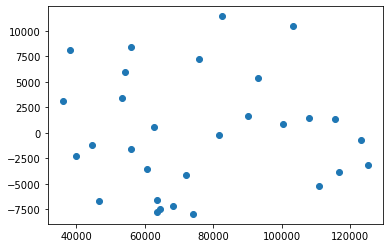

In [38]:
plt.scatter(model2.fittedvalues,model2.resid)

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

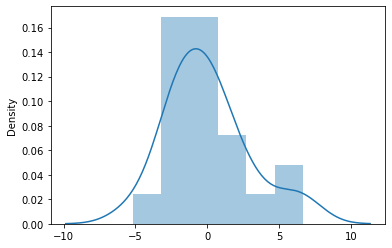

In [39]:
sns.distplot(model.resid)

In [40]:
model.resid.mean()

-6.767073673905716e-16

# Prediction

In [41]:
df2_new=pd.Series([2,3,4])
df2_new

0    2
1    3
2    4
dtype: int64

In [42]:
df2_pred=pd.DataFrame(df2_new,columns=['YearsExperience'])
df2_pred

,YearsExperience
0,2
1,3
2,4


In [43]:
model2.predict(df2_pred)

0    44692.124842
1    54142.087163
2    63592.049484
dtype: float64